<a href="https://colab.research.google.com/github/Komal123-cloud-cmyk/openai-whisper-speech-transcription/blob/main/Task1_WebScraoing_Komal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4 pandas



In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Target website
url = "https://quotes.toscrape.com/page/1/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract data
quotes = soup.find_all("span", class_="text")
authors = soup.find_all("small", class_="author")

data = []
for q, a in zip(quotes, authors):
    data.append({"Quote": q.text, "Author": a.text})

# Convert to DataFrame
df = pd.DataFrame(data)
print(df.head())



                                               Quote           Author
0  “The world as we have created it is a process ...  Albert Einstein
1  “It is our choices, Harry, that show what we t...     J.K. Rowling
2  “There are only two ways to live your life. On...  Albert Einstein
3  “The person, be it gentleman or lady, who has ...      Jane Austen
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe


In [ ]:
df.to_csv("quotes.csv", index=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

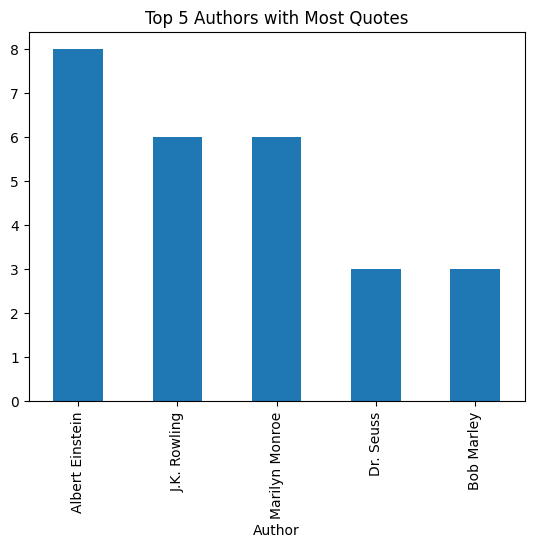

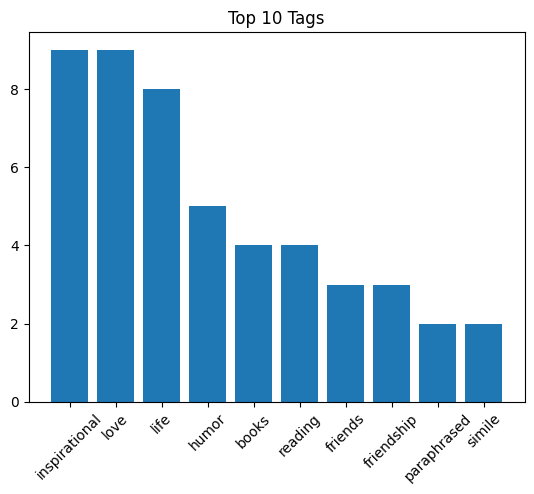

In [ ]:
from google.colab import files
files.download("quotes.csv")

all_data = []

for page in range(1, 6):  # scrape first 5 pages
    url = f"https://quotes.toscrape.com/page/{page}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    quotes = soup.find_all("span", class_="text")
    authors = soup.find_all("small", class_="author")

    for q, a in zip(quotes, authors):
        all_data.append({"Quote": q.text, "Author": a.text})

df = pd.DataFrame(all_data)
df.to_csv("all_quotes.csv", index=False)


all_data = []

for page in range(1, 6):
    url = f"https://quotes.toscrape.com/page/{page}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    quotes = soup.find_all("div", class_="quote")

    for q in quotes:
        text = q.find("span", class_="text").text
        author = q.find("small", class_="author").text
        tags = [tag.text for tag in q.find_all("a", class_="tag")]

        all_data.append({"Quote": text, "Author": author, "Tags": ", ".join(tags)})

df = pd.DataFrame(all_data)
df.to_csv("quotes_with_tags.csv", index=False)
df.head()

import matplotlib.pyplot as plt

# Top 5 authors with most quotes
top_authors = df['Author'].value_counts().head(5)
top_authors.plot(kind='bar')
plt.title("Top 5 Authors with Most Quotes")
plt.show()

# Most common tags
from collections import Counter

all_tags = []
for t in df['Tags'].dropna():
    all_tags.extend(t.split(", "))

tag_counts = Counter(all_tags).most_common(10)
tags, counts = zip(*tag_counts)

plt.bar(tags, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Tags")
plt.show()



In [1]:
import pandas as pd

df = pd.read_csv("Task1_Final_Quotes.csv")  # or another dataset
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Task1_Final_Quotes.csv'

In [3]:
import pandas as pd

# Load Titanic dataset directly (no upload needed)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Fill Age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-2705645296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-2705645296.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [5]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Keep only non-outliers
df = df[(df['Fare'] >= lower) & (df['Fare'] <= upper)]


In [6]:
from sklearn.preprocessing import LabelEncoder

# Label Encode Sex
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0

# One-Hot Encode Embarked
df = pd.get_dummies(df, columns=['Embarked'])


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])


In [8]:
df.to_csv("Task2_Cleaned_Titanic.csv", index=False)


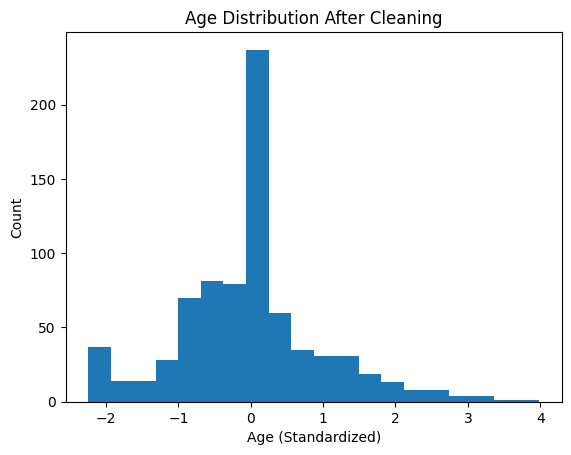

In [9]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20)
plt.title("Age Distribution After Cleaning")
plt.xlabel("Age (Standardized)")
plt.ylabel("Count")
plt.show()


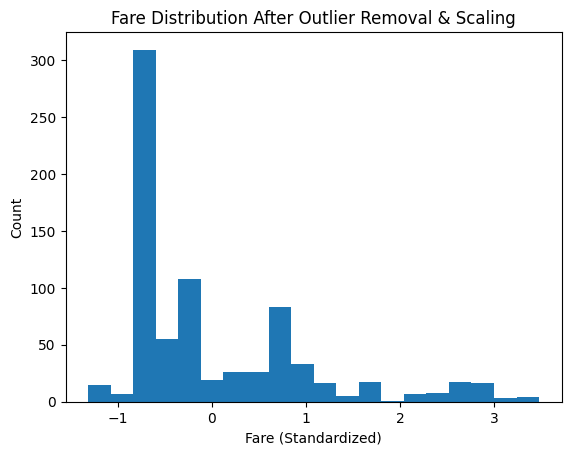

In [10]:
plt.hist(df['Fare'], bins=20)
plt.title("Fare Distribution After Outlier Removal & Scaling")
plt.xlabel("Fare (Standardized)")
plt.ylabel("Count")
plt.show()


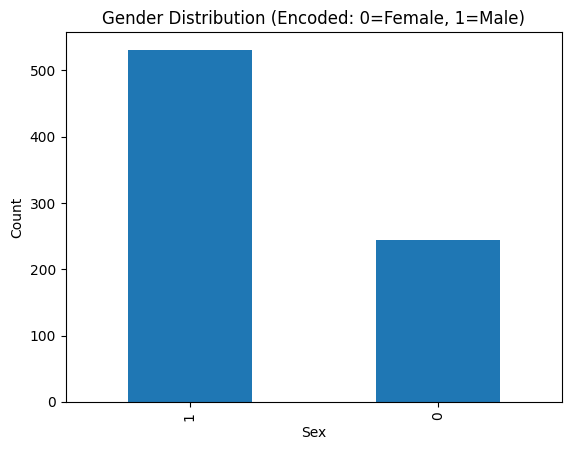

In [11]:
df['Sex'].value_counts().plot(kind='bar')
plt.title("Gender Distribution (Encoded: 0=Female, 1=Male)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


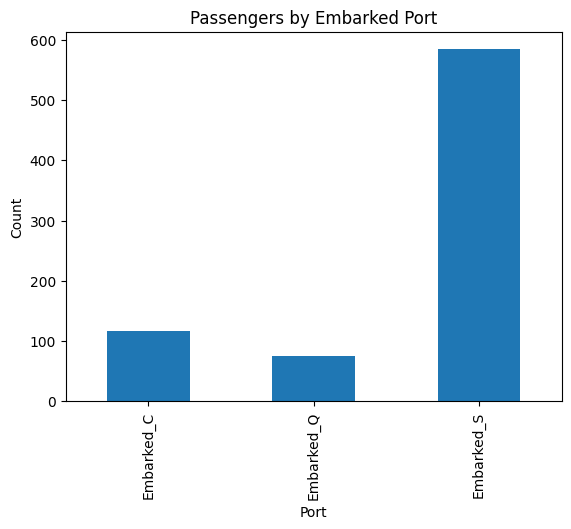

In [12]:
embarked_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
df[embarked_cols].sum().plot(kind='bar')
plt.title("Passengers by Embarked Port")
plt.xlabel("Port")
plt.ylabel("Count")
plt.show()
